더미 변수라고도 불리는 가변수 처리는 범주형 변수를 0과 1의 값을 가지는 변수로 변환해 주는 것을 뜻한다

**가변수를 만드는 이유는 범주형 변수는 사용할 수 없고 연속형 변수만 사용 가능한 분석기법을 사용하기 위함이다**

이런 형태는 이진변수라고도 하며, 불리언 변수라고도 한다



**선형 회귀분석이나 로지스틱 회귀분석 등의 회귀분석은 기본적으로 연속형 변수만 사용할 수 있다**

선형회귀 모델을 통해 고객별 구매금액을 예측하고자 했을 때 성별을 독립변수로 사용하고자 한다면

회귀모델은 남성과 여성을 인식할 수 없다

차원상의 좌표가 필요하기 때문이다

따라서 남자는 0, 여자는 1인 식으로 바꿔주는 것이다

일반적으로 해당 안 됨은 0, 해당됨은 1로 처리한다

만약 범주가 3개 이상인 경우는 어떻게 가변수 처리를 해줘야 할까?

범주가 늘어날수록 변수의 수를 늘리면 된다

예를 들어 혈액형의 가변수를 만들고자 한다면 혈액형 가변수를 3개 만드는 것이다

**여기서 중요한 점은 범주의 개수보다 하나 적게 가변수를 만드는 것이다**

가변수가 범주의 수보다 하나 적게 만들어지는 것은 꼭 데이터의 효율성 때문만은 아니다

가변수 처리를 하는 것은 기존 하나의 변수를 여러 개의 변수로 나눠준 것이다

그랬을 때 각각의 변수는 독립성을 가지고 있어야 한다

쉽게 말해 독립변수 간에는 서로 영향을 주지 않아야 한다

만약 독립변수 간에 강한 상관성이 존재하게 된다면 다중공선성 문제가 발생한다

변수간의 독립성을 위해 하나의 범주 가변수를 제거해 주는 것이 중요하다

# 범주형 변수의 가변수 처리 실습

# 1. 패키지 임포트

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 2. 데이터 불러오기 및 확인

In [2]:
df = pd.read_csv('/content/drive/MyDrive/데이터분석/데이터 반드시 알아야 할 모든 것/10. 범주형 변수의 가변수 처리/GPU_CPU_benchmark.csv')

df.head()

,Device Name,Compute Type,OS,Median Score
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,CPU,Linux,78.570
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,CPU,Windows,297.940
2,2X 12th Gen Intel Core i9-12900KF,CPU,Windows,424.470
3,2X AMD EPYC 7343 16-Core Processor,CPU,Linux,439.210
4,2X AMD Opteron Processor 6276,CPU,Windows,81.478


# 3. 가변수 처리할 칼럼들의 범주별 분포 시각화

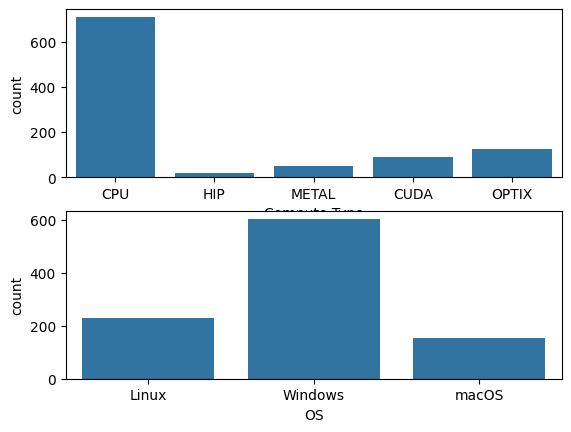

In [8]:
# 변경할 칼럼 범주별 분포 시각화
fig, ax = plt.subplots(nrows=2)

# compute Type 칼럼 범주별 분호
sns.countplot(x='Compute Type', data =df, ax =ax [0])

# OS 칼럼 범주별 분포
sns.countplot(x='OS', data=df, ax=ax[1])

plt.show()

# 4. 전체 칼럼 일괄 가변수 처리

In [10]:
df1 = pd.get_dummies(df, dtype =int)

df1.head()

,Median Score,Device Name_12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,Device Name_24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,Device Name_2X 12th Gen Intel Core i9-12900KF,Device Name_2X AMD EPYC 7343 16-Core Processor,Device Name_2X AMD Opteron Processor 6276,Device Name_2X AMD Opteron(tm) Processor 6328,Device Name_2X AMD Ryzen Threadripper PRO 3995WX 64-Cores,Device Name_2X Genuine Intel CPU 0000 @ 2.00GHz,Device Name_2X Genuine Intel CPU 0000 @ 2.10GHz,...,Device Name_T500,Device Name_Virtual CPU @ 2.99GHz,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,78.570,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,297.940,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,424.470,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,439.210,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,81.478,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# 5. 전체 칼럼 일괄 가변수 처리


In [11]:
df2 = pd.get_dummies(df, columns = ['Compute Type', 'OS'], dtype = int)

df2.head()

,Device Name,Median Score,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,1,0,0,0,0,1,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,1,0,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,1,0,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,1,0,0,0,0,1,0,0
4,2X AMD Opteron Processor 6276,81.478,1,0,0,0,0,0,1,0


# 6. 하나의 가변수 범주 제거 옵션 적용

In [12]:
df3 = pd.get_dummies(df, columns=['Compute Type', 'OS'], drop_first= True, dtype = int)

df3.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,1,0


가변수 처리한 데이터셋을 모델에 적용할 때는 다중공선성 문제를 방지하기 위해 하나의 범주 칼럼을 제거해 줘야 한다

drop_first =True 옵션을 설정하면 자동으로 첫번째 범주를 제거해준다

# 7. 결측값을 별도의 칼럼으로 처리 옵션 적용



In [14]:
df4 = pd.get_dummies(df, columns =['Compute Type', 'OS'],
                     drop_first=True,  dummy_na=True, dtype = int)

df4.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,Compute Type_nan,OS_Windows,OS_macOS,OS_nan
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,0,1,0,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,0,1,0,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,0,1,0,0


가변수 처리를 하기 전에 결측값 처리를 한 경우는 상관없지만
결측값이 있는 상태로 가변수 처리를 할 때는 결측값을 별도의 범주로 처리하는 옵션을 적용하는 것이 좋다

범주형 값이 결측값인 것 자체가 의미가 생길 수 있으므로 dummy_na=True 옵션을 적용하여 결측값 범주를 생성해 준다

아웃풋 테이블에서 '_nan' 접미사가 붙은 칼럼들이 생긴 것을 알 수 있다